In [42]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# hyper_param_bert_cased = pd.read_csv("hyperparam_res_bert-base-cased.csv")
hyper_param_bert_cased = pd.read_csv("hyperparam_res_roberta-base.csv")
hyper_param_bert_cased

,precision,recall,f1-score,support,learning_rate,learning_schedule,inserted,deleted,subbed,back_translated,swapped
0,0.617021,0.564202,0.589431,257.0,0.00001,linear,False,False,False,False,False
1,0.552189,0.638132,0.592058,257.0,0.00001,linear,True,False,False,False,False
2,0.589354,0.603113,0.596154,257.0,0.00001,linear,False,False,True,False,False
3,0.625000,0.447471,0.521542,257.0,0.00001,linear,False,False,False,True,False
4,0.531148,0.630350,0.576512,257.0,0.00001,linear,False,True,False,False,False
5,0.533784,0.614786,0.571429,257.0,0.00001,linear,False,False,False,False,True
6,0.579151,0.583658,0.581395,257.0,0.00001,constant,False,False,False,False,False
7,0.583969,0.595331,0.589595,257.0,0.00001,constant,True,False,False,False,False
8,0.570370,0.599222,0.584440,257.0,0.00001,constant,False,False,True,False,False
9,0.576037,0.486381,0.527426,257.0,0.00001,constant,False,False,False,True,False


In [44]:
linear_results_low_lr = hyper_param_bert_cased[(hyper_param_bert_cased['learning_schedule'] == 'linear') & (hyper_param_bert_cased['learning_rate'] == 0.00001)]['f1-score'].to_numpy()
linear_results_high_lr = hyper_param_bert_cased[(hyper_param_bert_cased['learning_schedule'] == 'linear') & (hyper_param_bert_cased['learning_rate'] == 0.00005)]['f1-score'].to_numpy()
constant_results_low_lr = hyper_param_bert_cased[(hyper_param_bert_cased['learning_schedule'] == 'constant') & (hyper_param_bert_cased['learning_rate'] == 0.00001)]['f1-score'].to_numpy()
constant_results_high_lr = hyper_param_bert_cased[(hyper_param_bert_cased['learning_schedule'] == 'constant') & (hyper_param_bert_cased['learning_rate'] == 0.00005)]['f1-score'].to_numpy()

In [45]:
aug_techniques = ['inserted', 'deleted', 'subbed', 'back_translated', 'swapped']

aug_tech_used = []

for row in hyper_param_bert_cased.iterrows():
    tech_found = False
    for aug_tech in aug_techniques:
        if row[1][aug_tech]:
            aug_tech_used.append(aug_tech)
            tech_found = True
    
    if not tech_found:
        aug_tech_used.append('None')

In [46]:
### FULL HYPERPARAM PLOT ###

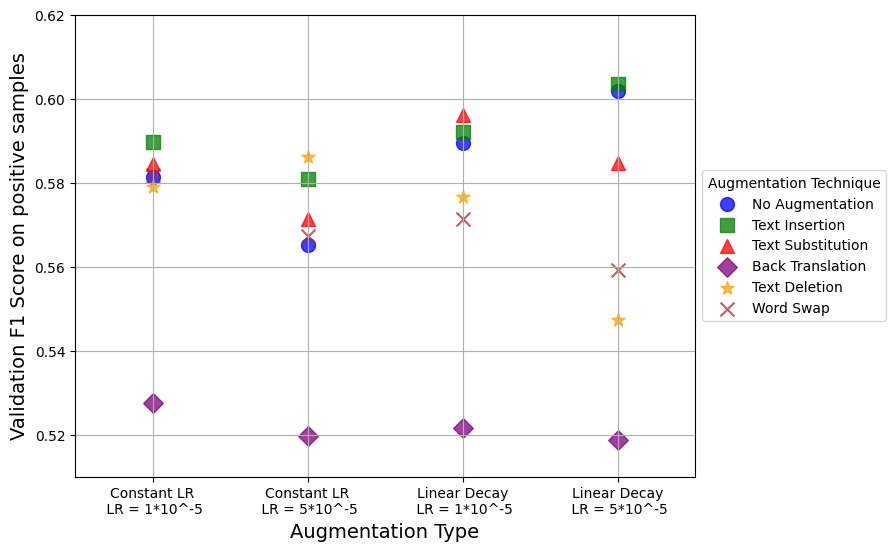

In [47]:
values = np.concatenate([constant_results_low_lr, constant_results_high_lr, linear_results_low_lr, linear_results_high_lr])
categories = np.concatenate(
    [len(constant_results_low_lr) * ['Constant LR\n LR = 1*10^-5'],
     len(constant_results_high_lr) * ['Constant LR\n LR = 5*10^-5'],
     len(linear_results_low_lr) * ['Linear Decay\n LR = 1*10^-5'],
     len(linear_results_high_lr) * ['Linear Decay\n LR = 5*10^-5']])

plt.figure(figsize=(8, 6))  # Adjust for better fit to your data

markers = {
    'None': 'o',  # Circle
    'inserted': 's',  # Square
    'subbed': '^',  # Triangle Up
    'back_translated': 'D',  # Diamond
    'deleted': '*',  # Star
    'swapped': 'x'
    }

colors = {
    'None': 'blue',            # Blue for "None"
    'inserted': 'green',       # Green for "inserted"
    'subbed': 'red',           # Red for "subbed"
    'back_translated': 'purple', # Purple for "back_translated"
    'deleted': 'orange',       # Orange for "deleted"
    'swapped': 'brown'         # Brown for "swapped"
}

for i in range(len(values)):
    plt.scatter(
        categories[i],
        values[i],
        marker = markers[aug_tech_used[i]],
        color = colors[aug_tech_used[i]],
        s = 100,
        alpha = 0.75
        )

custom_names = {
    'None': 'No Augmentation',
    'inserted': 'Text Insertion',
    'subbed': 'Text Substitution',
    'back_translated': 'Back Translation',
    'deleted': 'Text Deletion',
    'swapped': 'Word Swap'
    }

for aug_tech, marker in markers.items():
    plt.scatter([], [], marker=marker, color=colors[aug_tech], 
                label=custom_names[aug_tech], s=100, alpha=0.75)

legend = plt.legend(title='Augmentation Technique', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(-0.5, 3.5)
plt.grid('on')
plt.ylabel('Validation F1 Score on positive samples', fontsize=14)
plt.xlabel('Augmentation Type', fontsize=14)  # Increased font size for x-label
plt.ylim(0.51, 0.62)
plt.savefig('figs/hyper_param_resuls_roberta.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

In [48]:
### BEST HYPERPARAM AUGMENTATION BARPLOT ###

In [49]:
hyper_param_bert_cased = pd.read_csv("hyperparam_res_roberta-base.csv")

In [50]:
linear_results_high_lr_df = hyper_param_bert_cased[(hyper_param_bert_cased['learning_schedule'] == 'linear') & (hyper_param_bert_cased['learning_rate'] == 0.00005)]

In [51]:
linear_results_high_lr_df['f1-score'].to_numpy()

array([0.60183486, 0.60335196, 0.58461538, 0.51864407, 0.54727794,
       0.55909944])

In [52]:
aug_techniques = ['inserted', 'deleted', 'subbed', 'back_translated', 'swapped']

aug_tech_used = []

for row in linear_results_high_lr_df.iterrows():
    tech_found = False
    for aug_tech in aug_techniques:
        if row[1][aug_tech]:
            aug_tech_used.append(aug_tech)
            tech_found = True
    
    if not tech_found:
        aug_tech_used.append('None')

custom_names = {
    'None': 'No Augmentation',
    'inserted': 'Text Insertion',
    'subbed': 'Text Substitution',
    'back_translated': 'Back Translation',
    'deleted': 'Text Deletion',
    'swapped': 'Word Swap'
    }

aug_tech_used_rename = [custom_names[key] for key in aug_tech_used]

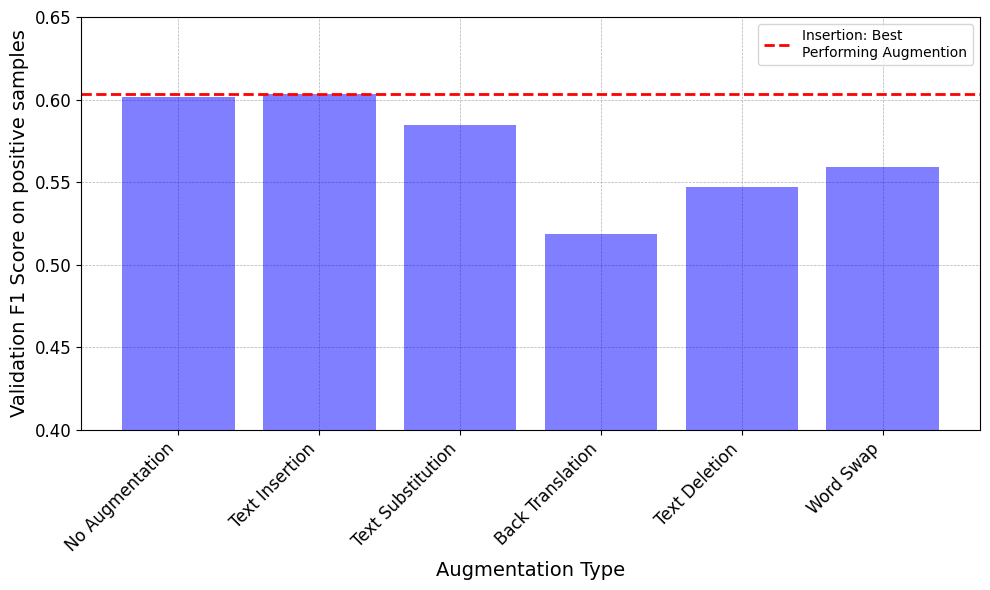

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    aug_tech_used_rename,
    linear_results_high_lr_df['f1-score'].to_numpy(),
    color='blue', 
    alpha = 0.5
    )

plt.xticks(rotation=45, ha="right", fontsize=12)  # Increased font size for x-ticks
plt.yticks(fontsize=12)  # Increased font size for y-ticks
plt.ylim(0.4, 0.65)
plt.ylabel('Validation F1 Score on positive samples', fontsize=14)
plt.xlabel('Augmentation Type', fontsize=14)  # Increased font size for x-label

ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Added grid lines for better readability
ax.set_axisbelow(True)  # Ensure grid lines are behind the bars
ax.axhline(linear_results_high_lr_df['f1-score'].to_numpy()[1], color='red', linestyle='--', linewidth=2, label='Insertion: Best\nPerforming Augmention')

plt.legend()
plt.tight_layout()

plt.savefig('figs/optimal_hyperparam_roberta_aug_compare.png')
fig.show()